<a href="https://colab.research.google.com/github/labdhidoshi23/DL-_ISE/blob/main/DL_ISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [ ]:
diabetes = load_diabetes()
X = diabetes.data                      # Features, shape (442, 10)
y = diabetes.target.reshape(-1, 1)     # Targets, shape (442, 1)

In [ ]:
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y)

In [ ]:
# Network architecture
input_size = X.shape[1]    # 10
hidden_size = 5
output_size = 1
learning_rate = 0.01
n_epochs = 100

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

In [ ]:
# Training loop (SGD)
loss_history = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for i in range(X.shape[0]):
        # Forward pass
        x_i = X[i:i+1]                   # Shape (1, 10)
        y_i = y_scaled[i:i+1]            # Shape (1, 1)
        z1 = np.dot(x_i, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        y_pred = z2                      # Linear activation

        # Loss (Mean Squared Error)
        loss = (y_i - y_pred) ** 2
        epoch_loss += loss.item()

        # Backward pass (SGD updates)
        d_loss_pred = -2 * (y_i - y_pred)
        d_pred_z2 = 1
        d_loss_z2 = d_loss_pred * d_pred_z2

        d_loss_W2 = np.dot(a1.T, d_loss_z2)
        d_loss_b2 = d_loss_z2

        d_loss_a1 = np.dot(d_loss_z2, W2.T)
        d_loss_z1 = d_loss_a1 * sigmoid_derivative(a1)

        d_loss_W1 = np.dot(x_i.T, d_loss_z1)
        d_loss_b1 = d_loss_z1

        # Parameter updates
        W2 -= learning_rate * d_loss_W2
        b2 -= learning_rate * d_loss_b2
        W1 -= learning_rate * d_loss_W1
        b1 -= learning_rate * d_loss_b1
          # Store average loss for the epoch
    loss_history.append(epoch_loss / X.shape[0])

# Print loss history: first 5 epochs
print(loss_history[:5])

[0.0473120811596246, 0.04691051204734799, 0.046505094176732785, 0.04609657342668107, 0.04568572605936543]


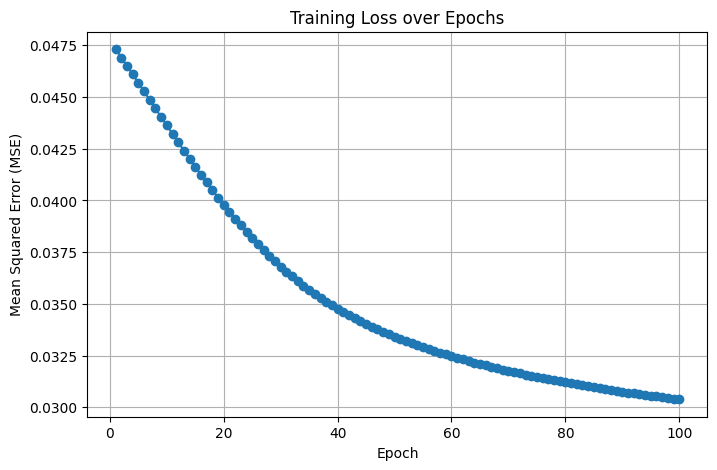

In [ ]:
import matplotlib.pyplot as plt

# Suppose loss_history is the list of average MSE per epoch returned from training
# Example: loss_history = [0.0358, 0.0357, 0.0356, 0.0356, 0.0355, ...]

plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


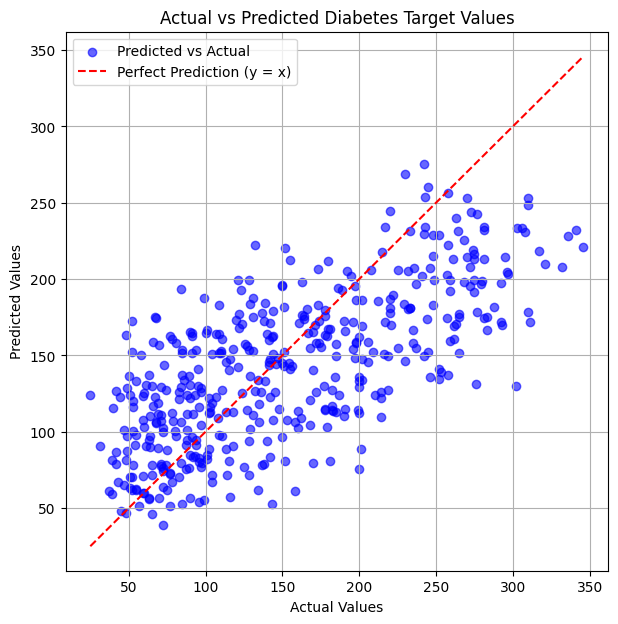

In [ ]:
a1_all = sigmoid(np.dot(X, W1) + b1)
y_pred_all_scaled = np.dot(a1_all, W2) + b2
# Inverse transform: scaled -> original target range
y_pred_all = target_scaler.inverse_transform(y_pred_all_scaled)
actual = y.flatten()                   # True actual values
predicted = y_pred_all.flatten()       # Model predicted values
plt.figure(figsize=(7, 7))
plt.scatter(actual, predicted, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Perfect Prediction (y = x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Diabetes Target Values')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
!git remote add origin git@github.com:labdhidoshi23/DL-_ISE.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
